### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [3]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

In [4]:
df2[df2['nome_drs']!= 'Grande São Paulo']

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos,casos_novos,obitos,obitos_novos
0,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-02,0,0,0,0
1,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-03,0,0,0,0
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,28,5,0,0
3,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-05,717,34,27,2
4,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-06,163,3,10,1
...,...,...,...,...,...,...,...,...,...,...,...
3220,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-02,0,0,0,0
3221,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-03,0,0,0,0
3222,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-04,0,0,0,0
3223,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-05,0,0,0,0


In [5]:
df2[df2['nome_drs']!= 'Grande São Paulo'].groupby(by='ano_mes')['obitos_novos'].sum()

ano_mes
2020-02      0
2020-03      3
2020-04    355
2020-05    881
2020-06    162
Name: obitos_novos, dtype: int64

Text(0.5, 1.0, 'Total de óbitos por DRS')

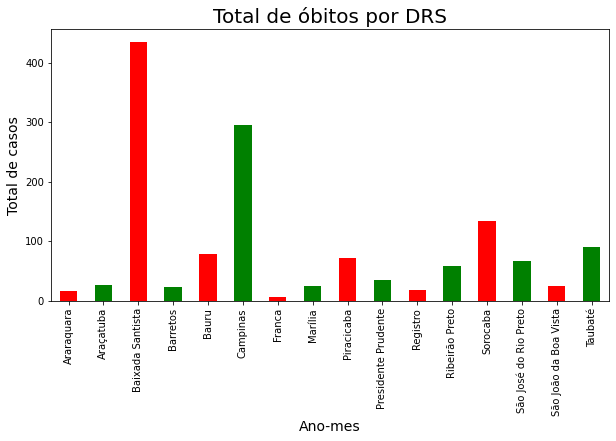

In [11]:
ax = df2[df2['nome_drs']!= 'Grande São Paulo'].groupby(by='nome_drs')['obitos_novos'].sum().plot(figsize=(10,5),kind='bar',color=['red','green'])
ax.set_xlabel('Ano-mes',fontdict={'fontsize':14})
ax.set_ylabel('Total de casos',fontdict={'fontsize':14})
ax.set_title('Total de óbitos por DRS',fontdict={'fontsize':20})


**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

In [7]:
df2[df2['ano_mes']== '2020-04']

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos,casos_novos,obitos,obitos_novos
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,28,5,0,0
7,Adolfo,3500204,São José do Rio Preto,15.0,3447.0,761.0,2020-04,1,1,0,0
12,Aguaí,3500303,São João da Boa Vista,14.0,35608.0,5245.0,2020-04,43,14,2,2
17,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-04,152,15,23,1
22,Alambari,3500758,Sorocaba,6.0,5779.0,830.0,2020-04,15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3202,Águas de São Pedro,3500600,Piracicaba,11.0,3122.0,764.0,2020-04,21,1,0,0
3207,Álvares Florence,3501202,São José do Rio Preto,15.0,3621.0,991.0,2020-04,0,0,0,0
3212,Álvares Machado,3501301,Presidente Prudente,2.0,23789.0,4267.0,2020-04,3,1,0,0
3217,Álvaro de Carvalho,3501400,Marília,5.0,5044.0,583.0,2020-04,0,0,0,0


Text(0.5, 0, 'Total de óbitos')

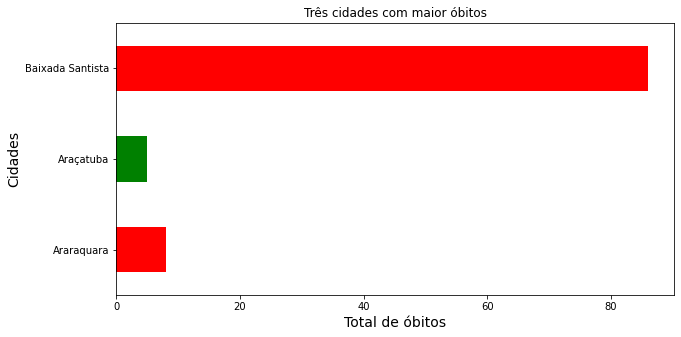

In [8]:
ax = df2[df2['ano_mes']== '2020-04'].groupby(by='nome_drs')['obitos_novos'].sum().head(3).plot(figsize=(10,5),kind='barh',color=['red','green'],title='Três cidades com maior óbitos')
ax.set_ylabel('Cidades',fontdict={'fontsize':14})
ax.set_xlabel('Total de óbitos',fontdict={'fontsize':14})

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

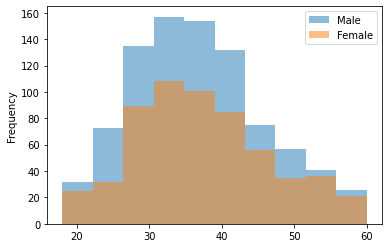

In [9]:
ax1 = df1[df1['Gender']=='Male'].plot(kind='hist',y='Age',alpha=0.5,label='Male')
ax2 = df1[df1['Gender']=='Female'].plot(kind='hist',y='Age',alpha=0.5,label='Female',ax=ax1)

**b)** Faça agora um boxplot das idades, por gênero.

<AxesSubplot:title={'center':'Age'}, xlabel='Gender'>

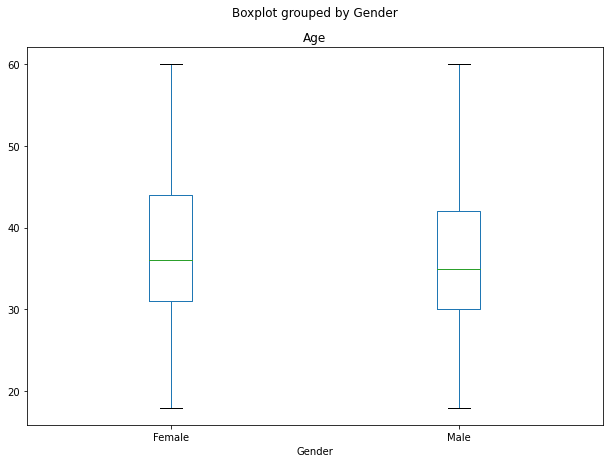

In [10]:
df1.boxplot(column='Age',by='Gender',grid=False,figsize=(10,7))
